# Name: Paavani Ramakrishna
# Git Username: paavani2000
# USC id: 7696462483

# 1.Supervised, Semi-Supervised, and Unsupervised Learning

(a)Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data , which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv("../Data/wdbc.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
column_names = ["id", "diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
df.columns = column_names
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

b)Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning
M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall,F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [8]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
from tabulate import tabulate
import io
import requests

train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': []}
test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': []}
visualization_data = None
M = 30  # Monte Carlo iterations

# === MONTE CARLO SUPERVISED EVALUATION ===
print(f"\nRunning Monte Carlo simulation with M={M} iterations...")

for i in range(M):
    print(f"Iteration {i+1}/{M}")
    
    # Stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=i)
    
    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # GridSearchCV to find best C
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    base_model = LinearSVC(penalty='l1', dual=False, class_weight='balanced', max_iter=100000)
    
    grid_search = GridSearchCV(base_model, param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Calibrate for probability outputs
    calibrated_model = CalibratedClassifierCV(best_model, cv=5)
    calibrated_model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    y_train_proba = calibrated_model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = calibrated_model.predict_proba(X_test_scaled)[:, 1]

    # Store metrics
    train_metrics['accuracy'].append(accuracy_score(y_train, y_train_pred))
    train_metrics['precision'].append(precision_score(y_train, y_train_pred))
    train_metrics['recall'].append(recall_score(y_train, y_train_pred))
    train_metrics['f1_score'].append(f1_score(y_train, y_train_pred))
    train_metrics['auc'].append(roc_auc_score(y_train, y_train_proba))
    
    test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics['precision'].append(precision_score(y_test, y_test_pred))
    test_metrics['recall'].append(recall_score(y_test, y_test_pred))
    test_metrics['f1_score'].append(f1_score(y_test, y_test_pred))
    test_metrics['auc'].append(roc_auc_score(y_test, y_test_proba))
    
    # Save first iteration’s data for visualization
    if i == 0:
        visualization_data = {
            'train_cm': confusion_matrix(y_train, y_train_pred),
            'test_cm': confusion_matrix(y_test, y_test_pred),
            'y_test': y_test,
            'y_test_proba': y_test_proba,
            'best_C': best_model.C
        }

# === AVERAGE METRICS ===
avg_train = {m: np.mean(train_metrics[m]) for m in train_metrics}
std_train = {m: np.std(train_metrics[m]) for m in train_metrics}
avg_test = {m: np.mean(test_metrics[m]) for m in test_metrics}
std_test = {m: np.std(test_metrics[m]) for m in test_metrics}

# === STORE IN GLOBAL VARIABLE ===
supervised_results = {
    "Model": "Supervised",
    "Train Accuracy": f"{avg_train['accuracy']:.4f} ± {std_train['accuracy']:.4f}",
    "Train Precision": f"{avg_train['precision']:.4f} ± {std_train['precision']:.4f}",
    "Train Recall": f"{avg_train['recall']:.4f} ± {std_train['recall']:.4f}",
    "Train F1": f"{avg_train['f1_score']:.4f} ± {std_train['f1_score']:.4f}",
    "Train AUC": f"{avg_train['auc']:.4f} ± {std_train['auc']:.4f}",
    "Test Accuracy": f"{avg_test['accuracy']:.4f} ± {std_test['accuracy']:.4f}",
    "Test Precision": f"{avg_test['precision']:.4f} ± {std_test['precision']:.4f}",
    "Test Recall": f"{avg_test['recall']:.4f} ± {std_test['recall']:.4f}",
    "Test F1": f"{avg_test['f1_score']:.4f} ± {std_test['f1_score']:.4f}",
    "Test AUC": f"{avg_test['auc']:.4f} ± {std_test['auc']:.4f}"
}

# === OPTIONAL: PREVIEW IN TABLE FORMAT ===
df_supervised = pd.DataFrame([supervised_results])
print("\nAverage Training Metrics:")
for metric in avg_train:
    print(f"{metric.capitalize()}: {avg_train[metric]:.3f} ± {std_train[metric]:.3f}")

print("\nAverage Test Metrics:")
for metric in avg_test:
    print(f"{metric.capitalize()}: {avg_test[metric]:.3f} ± {std_test[metric]:.3f}")


Running Monte Carlo simulation with M=30 iterations...
Iteration 1/30
Iteration 2/30
Iteration 3/30
Iteration 4/30
Iteration 5/30
Iteration 6/30
Iteration 7/30
Iteration 8/30
Iteration 9/30
Iteration 10/30
Iteration 11/30
Iteration 12/30
Iteration 13/30
Iteration 14/30
Iteration 15/30
Iteration 16/30
Iteration 17/30
Iteration 18/30
Iteration 19/30
Iteration 20/30
Iteration 21/30
Iteration 22/30
Iteration 23/30
Iteration 24/30
Iteration 25/30
Iteration 26/30
Iteration 27/30
Iteration 28/30
Iteration 29/30
Iteration 30/30

Average Training Metrics:
Accuracy: 0.983 ± 0.004
Precision: 0.976 ± 0.007
Recall: 0.978 ± 0.004
F1_score: 0.977 ± 0.005
Auc: 0.997 ± 0.001

Average Test Metrics:
Accuracy: 0.966 ± 0.017
Precision: 0.952 ± 0.030
Recall: 0.957 ± 0.027
F1_score: 0.954 ± 0.022
Auc: 0.994 ± 0.006


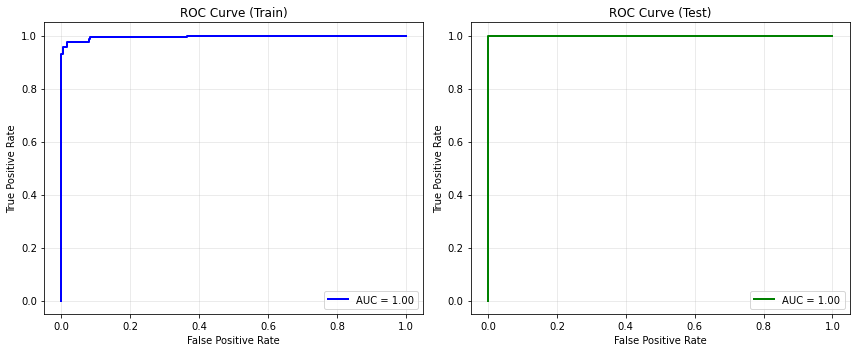

In [9]:
plt.figure(figsize=(12, 5))

# Train ROC
plt.subplot(1, 2, 1)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
auc_train = roc_auc_score(y_train, y_train_proba)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'AUC = {auc_train:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Train)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Test ROC
plt.subplot(1, 2, 2)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
auc_test = roc_auc_score(y_test, y_test_proba)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'AUC = {auc_test:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

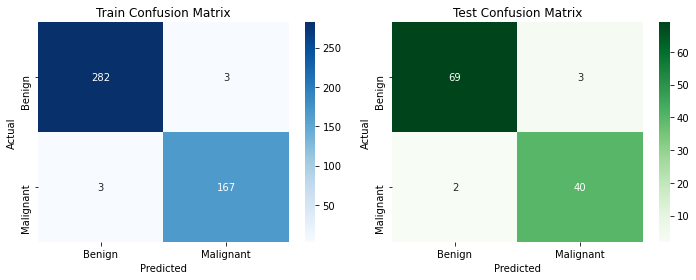

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot train confusion matrix
sns.heatmap(visualization_data['train_cm'], annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot test confusion matrix
sns.heatmap(visualization_data['test_cm'], annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

ii.Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
A.Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

B.Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [11]:
train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': []}
test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auc': []}
visualization_data = None

print(f"\nRunning Semi-Supervised Self-Training with M={M} iterations...")

for run in range(M):
    print(f"Iteration {run+1}/{M}")

    # === Split & Normalize ===
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=run)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # === Semi-supervised Split ===
    pos_idx = np.where(y_train == 1)[0]
    neg_idx = np.where(y_train == 0)[0]
    np.random.seed(run)
    np.random.shuffle(pos_idx)
    np.random.shuffle(neg_idx)

    labeled_idx = np.concatenate([pos_idx[:len(pos_idx)//2], neg_idx[:len(neg_idx)//2]])
    unlabeled_idx = np.concatenate([pos_idx[len(pos_idx)//2:], neg_idx[len(neg_idx)//2:]])

    X_labeled = X_train[labeled_idx]
    y_labeled = y_train.iloc[labeled_idx]
    X_unlabeled = X_train[unlabeled_idx]

    # === Self-training Loop (Batch Size = 10) ===
    while len(X_unlabeled) > 0:
        batch_size = min(10, len(X_unlabeled))

        grid = GridSearchCV(LinearSVC(penalty='l1', dual=False, class_weight='balanced', max_iter=100000),
                            param_grid, cv=5, scoring='accuracy')
        grid.fit(X_labeled, y_labeled)
        best_svm = grid.best_estimator_

        distances = np.abs(best_svm.decision_function(X_unlabeled))
        top_idxs = np.argsort(distances)[-batch_size:]  # farthest points

        X_batch = X_unlabeled[top_idxs]
        y_batch = best_svm.predict(X_batch)

        X_labeled = np.vstack([X_labeled, X_batch])
        y_labeled = np.append(y_labeled, y_batch)

        X_unlabeled = np.delete(X_unlabeled, top_idxs, axis=0)

    # === Final SVM on Full Labeled Set ===
    grid = GridSearchCV(LinearSVC(penalty='l1', dual=False, class_weight='balanced', max_iter=100000),
                        param_grid, cv=5, scoring='accuracy')
    grid.fit(X_labeled, y_labeled)
    final_model = grid.best_estimator_

    # === Predict and Evaluate ===
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)

    # Approximate probabilities for ROC
    train_scores = final_model.decision_function(X_train)
    test_scores = final_model.decision_function(X_test)
    y_train_proba = (train_scores - train_scores.min()) / (train_scores.max() - train_scores.min())
    y_test_proba = (test_scores - test_scores.min()) / (test_scores.max() - test_scores.min())

    for m, func in zip(['accuracy', 'precision', 'recall', 'f1_score', 'auc'],
                       [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]):
        train_metrics[m].append(func(y_train, y_train_pred))
        test_metrics[m].append(func(y_test, y_test_pred))

    if run == 0:
        visualization_data = {
            'train_cm': confusion_matrix(y_train, y_train_pred),
            'test_cm': confusion_matrix(y_test, y_test_pred),
            'y_test': y_test,
            'y_test_proba': y_test_proba
        }

# === AVERAGE METRICS ===
avg_train = {m: np.mean(train_metrics[m]) for m in train_metrics}
std_train = {m: np.std(train_metrics[m]) for m in train_metrics}
avg_test = {m: np.mean(test_metrics[m]) for m in test_metrics}
std_test = {m: np.std(test_metrics[m]) for m in test_metrics}

# === STORE IN GLOBAL DICT ===
semi_supervised_results = {
    "Model": "Semi-Supervised",
    "Train Accuracy": f"{avg_train['accuracy']:.4f} ± {std_train['accuracy']:.4f}",
    "Train Precision": f"{avg_train['precision']:.4f} ± {std_train['precision']:.4f}",
    "Train Recall": f"{avg_train['recall']:.4f} ± {std_train['recall']:.4f}",
    "Train F1": f"{avg_train['f1_score']:.4f} ± {std_train['f1_score']:.4f}",
    "Train AUC": f"{avg_train['auc']:.4f} ± {std_train['auc']:.4f}",
    "Test Accuracy": f"{avg_test['accuracy']:.4f} ± {std_test['accuracy']:.4f}",
    "Test Precision": f"{avg_test['precision']:.4f} ± {std_test['precision']:.4f}",
    "Test Recall": f"{avg_test['recall']:.4f} ± {std_test['recall']:.4f}",
    "Test F1": f"{avg_test['f1_score']:.4f} ± {std_test['f1_score']:.4f}",
    "Test AUC": f"{avg_test['auc']:.4f} ± {std_test['auc']:.4f}"
}

# === PRINT METRICS ===
print("\nAverage Training Metrics:")
for metric in avg_train:
    print(f"{metric.capitalize()}: {avg_train[metric]:.3f} ± {std_train[metric]:.3f}")

print("\nAverage Test Metrics:")
for metric in avg_test:
    print(f"{metric.capitalize()}: {avg_test[metric]:.3f} ± {std_test[metric]:.3f}")


Running Semi-Supervised Self-Training with M=30 iterations...
Iteration 1/30
Iteration 2/30
Iteration 3/30
Iteration 4/30
Iteration 5/30
Iteration 6/30
Iteration 7/30
Iteration 8/30
Iteration 9/30
Iteration 10/30
Iteration 11/30
Iteration 12/30
Iteration 13/30
Iteration 14/30
Iteration 15/30
Iteration 16/30
Iteration 17/30
Iteration 18/30
Iteration 19/30
Iteration 20/30
Iteration 21/30
Iteration 22/30
Iteration 23/30
Iteration 24/30
Iteration 25/30
Iteration 26/30
Iteration 27/30
Iteration 28/30
Iteration 29/30
Iteration 30/30

Average Training Metrics:
Accuracy: 0.978 ± 0.007
Precision: 0.969 ± 0.018
Recall: 0.972 ± 0.008
F1_score: 0.971 ± 0.009
Auc: 0.977 ± 0.006

Average Test Metrics:
Accuracy: 0.963 ± 0.017
Precision: 0.952 ± 0.026
Recall: 0.949 ± 0.033
F1_score: 0.950 ± 0.023
Auc: 0.960 ± 0.019


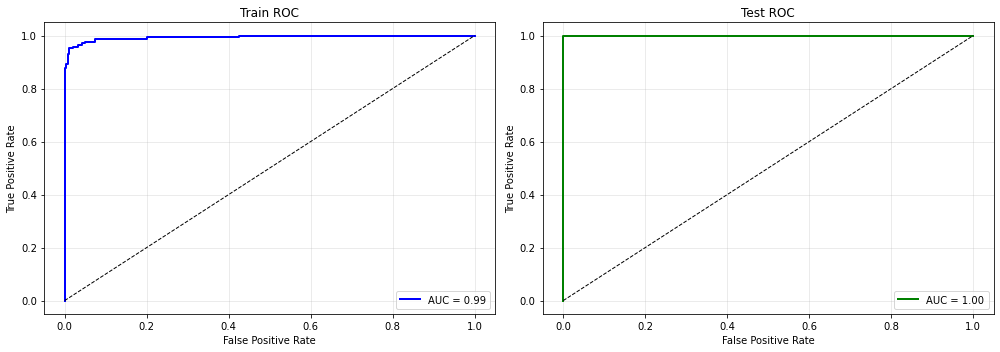

In [12]:
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(14, 5))

# Training ROC
plt.subplot(1, 2, 1)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'AUC = {train_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Test ROC
plt.subplot(1, 2, 2)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

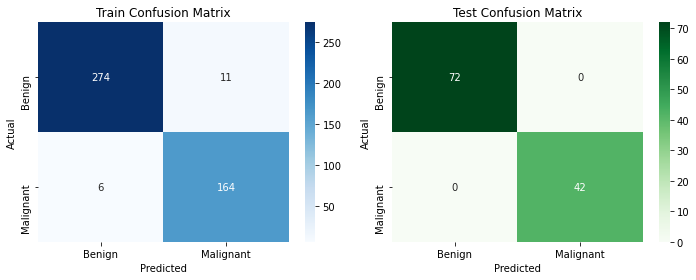

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Train Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Test Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.
A.Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

B.Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

C.Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [14]:
from sklearn.cluster import KMeans

np.random.seed(42)

# Split and normalize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Monte Carlo parameters
M = 30
train_metrics = []
test_metrics = []
best_run_data = None
best_auc = 0

# Monte Carlo simulation
for run in range(M):
    print(f"Iteration {run+1}/{M}")
    
    # A. KMeans with multiple initializations
    best_kmeans = None
    best_inertia = float('inf')
    
    for _ in range(10):  # 10 random initializations
        kmeans = KMeans(n_clusters=2, init='k-means++', n_init=1, max_iter=300, random_state=run*10+_)
        kmeans.fit(X_train_normalized)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_kmeans = kmeans
    
    # B. Cluster labeling
    train_distances = best_kmeans.transform(X_train_normalized)
    cluster_labels = {0: [], 1: []}
    
    for cluster in [0, 1]:
        distances = train_distances[:, cluster]
        nearest_indices = np.argpartition(distances, 30)[:30]
        nearest_labels = y_train.iloc[nearest_indices]
        majority = 1 if np.sum(nearest_labels) > 15 else 0
        cluster_labels[cluster] = majority
    
    benign_cluster = [k for k, v in cluster_labels.items() if v == 0]
    malignant_cluster = [k for k, v in cluster_labels.items() if v == 1]
    
    if not benign_cluster or not malignant_cluster:
        benign_cluster = [0]
        malignant_cluster = [1]
        cluster_labels = {0: 0, 1: 1}
    
    # Training predictions and scores
    train_pred = np.where(best_kmeans.labels_ == benign_cluster[0], 0, 1)
    train_scores = train_distances[:, benign_cluster[0]] - train_distances[:, malignant_cluster[0]]
    
    train_metrics.append({
        'accuracy': accuracy_score(y_train, train_pred),
        'precision': precision_score(y_train, train_pred),
        'recall': recall_score(y_train, train_pred),
        'f1': f1_score(y_train, train_pred),
        'auc': roc_auc_score(y_train, train_scores)
    })
    
    # Test predictions
    test_distances = best_kmeans.transform(X_test_normalized)
    test_pred = np.where(test_distances[:, benign_cluster[0]] < test_distances[:, malignant_cluster[0]], 0, 1)
    test_scores = test_distances[:, benign_cluster[0]] - test_distances[:, malignant_cluster[0]]
    current_auc = roc_auc_score(y_test, test_scores)
    
    test_metrics.append({
        'accuracy': accuracy_score(y_test, test_pred),
        'precision': precision_score(y_test, test_pred),
        'recall': recall_score(y_test, test_pred),
        'f1': f1_score(y_test, test_pred),
        'auc': current_auc
    })
    
    # Save best run for confusion matrix + AUC
    if current_auc > best_auc:
        best_auc = current_auc
        best_run_data = {
            'train_pred': train_pred,
            'test_pred': test_pred,
            'train_scores': train_scores,
            'test_scores': test_scores,
            'cm_train': confusion_matrix(y_train, train_pred),
            'cm_test': confusion_matrix(y_test, test_pred)
        }

# === Calculate average and std ===
avg_train = pd.DataFrame(train_metrics).mean()
std_train = pd.DataFrame(train_metrics).std()
avg_test = pd.DataFrame(test_metrics).mean()
std_test = pd.DataFrame(test_metrics).std()

# === Store in global result dictionary ===
kmeans_results = {
    "Model": "Unsupervised (KMeans)",
    "Train Accuracy": f"{avg_train['accuracy']:.4f} ± {std_train['accuracy']:.4f}",
    "Train Precision": f"{avg_train['precision']:.4f} ± {std_train['precision']:.4f}",
    "Train Recall": f"{avg_train['recall']:.4f} ± {std_train['recall']:.4f}",
    "Train F1": f"{avg_train['f1']:.4f} ± {std_train['f1']:.4f}",
    "Train AUC": f"{avg_train['auc']:.4f} ± {std_train['auc']:.4f}",
    "Test Accuracy": f"{avg_test['accuracy']:.4f} ± {std_test['accuracy']:.4f}",
    "Test Precision": f"{avg_test['precision']:.4f} ± {std_test['precision']:.4f}",
    "Test Recall": f"{avg_test['recall']:.4f} ± {std_test['recall']:.4f}",
    "Test F1": f"{avg_test['f1']:.4f} ± {std_test['f1']:.4f}",
    "Test AUC": f"{avg_test['auc']:.4f} ± {std_test['auc']:.4f}"
}

print("\nAverage Training Metrics:")
print(f"Accuracy:  {avg_train['accuracy']:.3f} ± {std_train['accuracy']:.3f}")
print(f"Precision: {avg_train['precision']:.3f} ± {std_train['precision']:.3f}")
print(f"Recall:    {avg_train['recall']:.3f} ± {std_train['recall']:.3f}")
print(f"F1-score:  {avg_train['f1']:.3f} ± {std_train['f1']:.3f}")
print(f"AUC:       {avg_train['auc']:.3f} ± {std_train['auc']:.3f}")

print("\nAverage Test Metrics:")
print(f"Accuracy:  {avg_test['accuracy']:.3f} ± {std_test['accuracy']:.3f}")
print(f"Precision: {avg_test['precision']:.3f} ± {std_test['precision']:.3f}")
print(f"Recall:    {avg_test['recall']:.3f} ± {std_test['recall']:.3f}")
print(f"F1-score:  {avg_test['f1']:.3f} ± {std_test['f1']:.3f}")
print(f"AUC:       {avg_test['auc']:.3f} ± {std_test['auc']:.3f}")


Iteration 1/30
Iteration 2/30
Iteration 3/30
Iteration 4/30
Iteration 5/30
Iteration 6/30
Iteration 7/30
Iteration 8/30
Iteration 9/30
Iteration 10/30
Iteration 11/30
Iteration 12/30
Iteration 13/30
Iteration 14/30
Iteration 15/30
Iteration 16/30
Iteration 17/30
Iteration 18/30
Iteration 19/30
Iteration 20/30
Iteration 21/30
Iteration 22/30
Iteration 23/30
Iteration 24/30
Iteration 25/30
Iteration 26/30
Iteration 27/30
Iteration 28/30
Iteration 29/30
Iteration 30/30

Average Training Metrics:
Accuracy:  0.908 ± 0.000
Precision: 0.905 ± 0.000
Recall:    0.841 ± 0.000
F1-score:  0.872 ± 0.000
AUC:       0.971 ± 0.000

Average Test Metrics:
Accuracy:  0.895 ± 0.000
Precision: 0.917 ± 0.000
Recall:    0.786 ± 0.000
F1-score:  0.846 ± 0.000
AUC:       0.978 ± 0.000


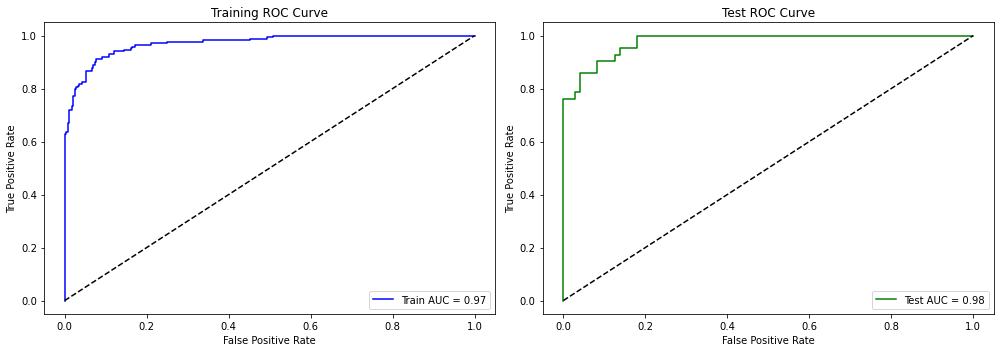

In [15]:
plt.figure(figsize=(14, 5))

# Training ROC
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_train, best_run_data['train_scores'])
auc_score = roc_auc_score(y_train, best_run_data['train_scores'])
plt.plot(fpr, tpr, color='blue', label=f'Train AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve')
plt.legend()

# Test ROC
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, best_run_data['test_scores'])
auc_score = roc_auc_score(y_test, best_run_data['test_scores'])
plt.plot(fpr, tpr, color='green', label=f'Test AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()


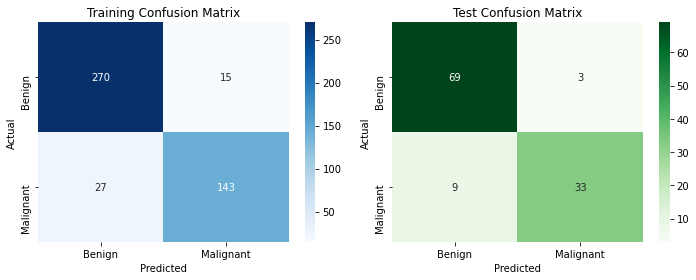

In [16]:
# Confusion matrices
plt.figure(figsize=(10, 4))

# Training confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(best_run_data['cm_train'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Test confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(best_run_data['cm_test'], annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


iv.Spectral Clustering : Repeat 1(b)iii using spectral clustering, which is clus-tering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [17]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import Normalizer

num_iterations = 30
data_normalizer = Normalizer()

train_metrics = {
    'accuracy': [], 'precision': [], 'recall': [],
    'f1_score': [], 'auc': []
}
test_metrics = {
    'accuracy': [], 'precision': [], 'recall': [],
    'f1_score': [], 'auc': []
}

best_run_data = None  # For ROC and CM plotting

print(f"\nRunning Spectral Clustering + KNN for {num_iterations} iterations...")

for iteration in range(num_iterations):
    train_features, test_features, train_labels, test_labels = train_test_split(X, y, random_state=iteration)
    normalized_train_features = data_normalizer.fit_transform(train_features)
    normalized_test_features = data_normalizer.transform(test_features)

    spectral_clusterer = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=iteration)
    cluster_labels = spectral_clusterer.fit_predict(normalized_train_features)

    if np.dot(train_labels, cluster_labels) < np.dot(train_labels, 1 - cluster_labels):
        adjusted_labels = 1 - cluster_labels
    else:
        adjusted_labels = cluster_labels

    knn_classifier = KNeighborsClassifier(n_neighbors=20)
    knn_classifier.fit(normalized_train_features, adjusted_labels)

    train_predictions = knn_classifier.predict(normalized_train_features)
    test_predictions = knn_classifier.predict(normalized_test_features)

    for m, func in zip(train_metrics.keys(), [
        accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]):
        train_metrics[m].append(func(train_labels, train_predictions))
        test_metrics[m].append(func(test_labels, test_predictions))

    if iteration == 0:
        best_run_data = {
            'train_labels': train_labels,
            'test_labels': test_labels,
            'train_preds': train_predictions,
            'test_preds': test_predictions
        }

    print(f"Iteration {iteration + 1}/{num_iterations} | "
          f"Train Accuracy: {train_metrics['accuracy'][-1]:.3f} | "
          f"Test Accuracy: {test_metrics['accuracy'][-1]:.3f}")

# === Average & Std ===
avg_train = {m: np.mean(train_metrics[m]) for m in train_metrics}
std_train = {m: np.std(train_metrics[m]) for m in train_metrics}
avg_test = {m: np.mean(test_metrics[m]) for m in test_metrics}
std_test = {m: np.std(test_metrics[m]) for m in test_metrics}

# === Store in results dictionary ===
spectral_results = {
    "Model": "Spectral Clustering + KNN",
    "Train Accuracy": f"{avg_train['accuracy']:.4f} ± {std_train['accuracy']:.4f}",
    "Train Precision": f"{avg_train['precision']:.4f} ± {std_train['precision']:.4f}",
    "Train Recall": f"{avg_train['recall']:.4f} ± {std_train['recall']:.4f}",
    "Train F1": f"{avg_train['f1_score']:.4f} ± {std_train['f1_score']:.4f}",
    "Train AUC": f"{avg_train['auc']:.4f} ± {std_train['auc']:.4f}",
    "Test Accuracy": f"{avg_test['accuracy']:.4f} ± {std_test['accuracy']:.4f}",
    "Test Precision": f"{avg_test['precision']:.4f} ± {std_test['precision']:.4f}",
    "Test Recall": f"{avg_test['recall']:.4f} ± {std_test['recall']:.4f}",
    "Test F1": f"{avg_test['f1_score']:.4f} ± {std_test['f1_score']:.4f}",
    "Test AUC": f"{avg_test['auc']:.4f} ± {std_test['auc']:.4f}"
}

# === Print Metrics ===
display_names = {
    'accuracy': 'Accuracy',
    'precision': 'Precision',
    'recall': 'Recall',
    'f1_score': 'F1-score',
    'auc': 'AUC'
}

print("\nAverage Training Metrics:")
for metric in display_names:
    print(f"{display_names[metric]}: {avg_train[metric]:.3f} ± {std_train[metric]:.3f}")

print("\nAverage Test Metrics:")
for metric in display_names:
    print(f"{display_names[metric]}: {avg_test[metric]:.3f} ± {std_test[metric]:.3f}")


Running Spectral Clustering + KNN for 30 iterations...
Iteration 1/30 | Train Accuracy: 0.883 | Test Accuracy: 0.881
Iteration 2/30 | Train Accuracy: 0.890 | Test Accuracy: 0.853
Iteration 3/30 | Train Accuracy: 0.878 | Test Accuracy: 0.909
Iteration 4/30 | Train Accuracy: 0.873 | Test Accuracy: 0.874
Iteration 5/30 | Train Accuracy: 0.880 | Test Accuracy: 0.902
Iteration 6/30 | Train Accuracy: 0.890 | Test Accuracy: 0.867
Iteration 7/30 | Train Accuracy: 0.897 | Test Accuracy: 0.818
Iteration 8/30 | Train Accuracy: 0.873 | Test Accuracy: 0.895
Iteration 9/30 | Train Accuracy: 0.885 | Test Accuracy: 0.881
Iteration 10/30 | Train Accuracy: 0.869 | Test Accuracy: 0.909
Iteration 11/30 | Train Accuracy: 0.880 | Test Accuracy: 0.888
Iteration 12/30 | Train Accuracy: 0.869 | Test Accuracy: 0.902
Iteration 13/30 | Train Accuracy: 0.894 | Test Accuracy: 0.867
Iteration 14/30 | Train Accuracy: 0.885 | Test Accuracy: 0.867
Iteration 15/30 | Train Accuracy: 0.876 | Test Accuracy: 0.888
Iteratio

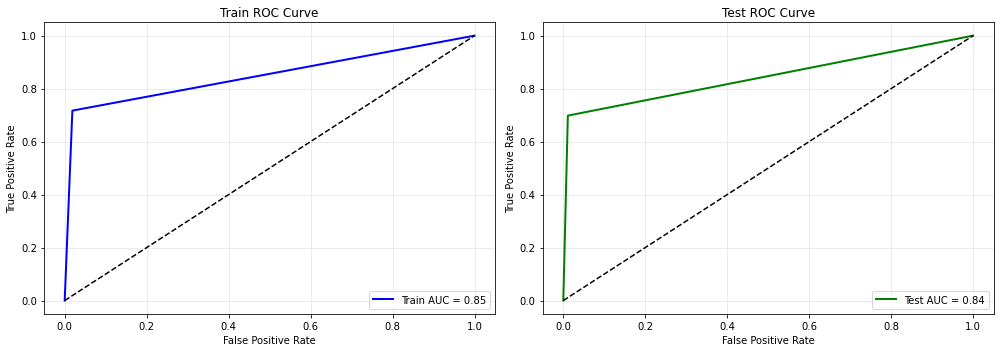

In [18]:
# ROC Curve Plot
fpr_train, tpr_train, _ = roc_curve(best_run_data['train_labels'], best_run_data['train_preds'])
fpr_test, tpr_test, _ = roc_curve(best_run_data['test_labels'], best_run_data['test_preds'])

train_auc = roc_auc_score(best_run_data['train_labels'], best_run_data['train_preds'])
test_auc = roc_auc_score(best_run_data['test_labels'], best_run_data['test_preds'])

plt.figure(figsize=(14, 5))

# Train ROC
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train AUC = {train_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# Test ROC
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


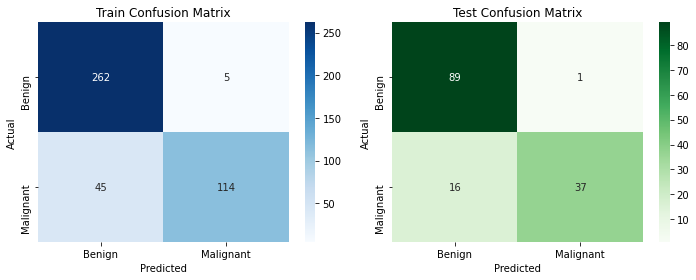

In [19]:
# Confusion Matrices
cm_train = confusion_matrix(best_run_data['train_labels'], best_run_data['train_preds'])
cm_test = confusion_matrix(best_run_data['test_labels'], best_run_data['test_preds'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Train CM
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Test CM
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


v.One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods

In [20]:
all_results = [
    supervised_results,
    semi_supervised_results,
    kmeans_results,
    spectral_results
]

# Fields to include
metrics = [
    "Train Accuracy", "Train Precision", "Train Recall", "Train F1", "Train AUC",
    "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Test AUC"
]

# Build DataFrame safely for all Python versions
rows = []
for model in all_results:
    row = {"Model": model["Model"]}
    for metric in metrics:
        row[metric] = model[metric]
    rows.append(row)

comparison_df = pd.DataFrame(rows)
comparison_df = comparison_df[["Model"] + metrics]  # Reorder columns

# Display table
from IPython.display import display
display(comparison_df)


,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Train AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC
0,Supervised,0.9827 ± 0.0036,0.9758 ± 0.0071,0.9780 ± 0.0043,0.9769 ± 0.0047,0.9973 ± 0.0011,0.9661 ± 0.0166,0.9519 ± 0.0300,0.9571 ± 0.0271,0.9542 ± 0.0222,0.9938 ± 0.0062
1,Semi-Supervised,0.9781 ± 0.0073,0.9695 ± 0.0181,0.9724 ± 0.0078,0.9708 ± 0.0095,0.9769 ± 0.0064,0.9635 ± 0.0167,0.9520 ± 0.0259,0.9492 ± 0.0330,0.9502 ± 0.0229,0.9605 ± 0.0191
2,Unsupervised (KMeans),0.9077 ± 0.0000,0.9051 ± 0.0000,0.8412 ± 0.0000,0.8720 ± 0.0000,0.9709 ± 0.0000,0.8947 ± 0.0000,0.9167 ± 0.0000,0.7857 ± 0.0000,0.8462 ± 0.0000,0.9775 ± 0.0000
3,Spectral Clustering + KNN,0.8809 ± 0.0086,0.9611 ± 0.0115,0.7101 ± 0.0257,0.8164 ± 0.0154,0.8464 ± 0.0116,0.8809 ± 0.0205,0.9639 ± 0.0222,0.7040 ± 0.0529,0.8124 ± 0.0349,0.8443 ± 0.0253


# 2.Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set from:https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [21]:
data = pd.read_csv('../Data/data_banknote_authentication.txt', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [22]:
X = data.drop('class', axis=1)
y = data['class']

test_ratio = 472 / (900 + 472)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

In [23]:
X_train

,variance,skewness,curtosis,entropy
855,-1.8782,-6.58650,4.84860,-0.021566
622,5.0429,-0.52974,0.50439,1.106000
969,-2.1786,-6.44790,6.03440,-0.207770
947,-1.6820,-6.81210,7.13980,1.332300
1199,-2.9138,-9.47110,9.76680,-0.602160
...,...,...,...,...
1095,1.1640,3.91300,-4.55440,-3.867200
1130,-2.2918,-7.25700,7.95970,0.921100
1294,-7.0364,9.29310,0.16594,-4.539600
860,-3.4605,2.69010,0.16165,-1.022400


In [24]:
X_test

,variance,skewness,curtosis,entropy
430,1.569100,6.3465,-0.18280,-2.409900
588,-0.278020,8.1881,-3.13380,-2.527600
296,0.051979,7.0521,-2.05410,-3.150800
184,-1.755900,11.9459,3.09460,-4.897800
244,2.428700,9.3821,-3.24770,-1.454300
...,...,...,...,...
1272,-4.233300,4.9166,-0.49212,-5.320700
865,-0.779950,3.2322,-3.28200,-3.100400
478,-1.778100,0.8546,7.13030,0.027572
793,-2.286000,-5.4484,5.80390,0.882310


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i.Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomlyselected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [25]:
from sklearn.utils import shuffle
from sklearn.metrics import zero_one_loss

def passive_learning(X_train, y_train, X_test, y_test):
    errors = []
    data_pool_X, data_pool_y = shuffle(X_train, y_train, random_state=42)
    
    for size in range(10, 901, 10):
        subset_X = data_pool_X[:size]
        subset_y = data_pool_y[:size]
        
        # SVM with L1 penalty (liblinear supports it)
        svm = GridSearchCV(
            LinearSVC(penalty='l1', dual=False, max_iter=5000),
            param_grid={'C': np.logspace(-3, 3, 7)},
            cv=5
        )
        svm.fit(subset_X, subset_y)
        
        y_pred = svm.predict(X_test)
        error = zero_one_loss(y_test, y_pred)
        errors.append(error)
        
    return errors


In [26]:
n_runs = 50
all_passive_errors = []
all_active_errors = []

for run in range(n_runs):
    X_train, X_test_split, y_train, y_test_split = train_test_split(X, y, train_size=900, test_size=472, random_state=run)
    errors = passive_learning(X_train, y_train, X_test_split, y_test_split)
    print(f"Run {run+1}/50 completed. Final test error: {errors[-1]:.4f}")
    all_passive_errors.append(passive_learning(X_train, y_train, X_test_split, y_test_split))
avg_errors = np.mean(all_passive_errors, axis=0)
std_errors = np.std(all_passive_errors, axis=0)

print("Average test errors over 50 runs:")
for i, (avg, std) in enumerate(zip(avg_errors, std_errors), start=1):
    print(f"{i*10} samples: Avg error = {avg:.4f}, Std = {std:.4f}")
#     all_active_errors.append(active_learning(X_train, y_train, X_test_split, y_test_split))

Run 1/50 completed. Final test error: 0.0127
Run 2/50 completed. Final test error: 0.0085
Run 3/50 completed. Final test error: 0.0127
Run 4/50 completed. Final test error: 0.0021
Run 5/50 completed. Final test error: 0.0106
Run 6/50 completed. Final test error: 0.0085
Run 7/50 completed. Final test error: 0.0042
Run 8/50 completed. Final test error: 0.0106
Run 9/50 completed. Final test error: 0.0148
Run 10/50 completed. Final test error: 0.0148
Run 11/50 completed. Final test error: 0.0064
Run 12/50 completed. Final test error: 0.0148
Run 13/50 completed. Final test error: 0.0191
Run 14/50 completed. Final test error: 0.0064
Run 15/50 completed. Final test error: 0.0064
Run 16/50 completed. Final test error: 0.0106
Run 17/50 completed. Final test error: 0.0106
Run 18/50 completed. Final test error: 0.0191
Run 19/50 completed. Final test error: 0.0021
Run 20/50 completed. Final test error: 0.0064
Run 21/50 completed. Final test error: 0.0106
Run 22/50 completed. Final test error: 0.01

ii. Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [27]:
def distance_to_hyperplane(clf, X):
    return np.abs(clf.decision_function(X))

def active_learning(X_train, y_train, X_test, y_test):
    errors = []
    
    remaining_idx = np.arange(len(X_train))
    pool_idx = np.random.choice(remaining_idx, size=10, replace=False)
    remaining_idx = np.setdiff1d(remaining_idx, pool_idx)
    
    for _ in range(90):  # 10 to 900
        subset_X = X_train[pool_idx]
        subset_y = y_train[pool_idx]
        
        svm = GridSearchCV(
            LinearSVC(penalty='l1', dual=False, max_iter=5000),
            param_grid={'C': np.logspace(-3, 3, 7)},
            cv=5
        )
        svm.fit(subset_X, subset_y)
        y_pred = svm.predict(X_test)
        error = zero_one_loss(y_test, y_pred)
        errors.append(error)
        
        # Stop if all training points are used
        if len(pool_idx) >= len(X_train):
            break
        
        # Pick 10 closest to hyperplane from remaining data
        distances = distance_to_hyperplane(svm.best_estimator_, X_train[remaining_idx])
        closest_indices = np.argsort(distances)[:10]
        selected = remaining_idx[closest_indices]
        
        pool_idx = np.concatenate([pool_idx, selected])
        remaining_idx = np.setdiff1d(remaining_idx, selected)
    
    return errors

In [28]:
n_runs = 50
all_active_errors = []

for run in range(n_runs):
    X_train, X_test_split, y_train, y_test_split = train_test_split(X, y, train_size=900, test_size=472, random_state=run)
    X_train = np.array(X_train)
    X_test_split = np.array(X_test_split)
    y_train = np.array(y_train)
    y_test_split = np.array(y_test_split)
    errors = active_learning(X_train, y_train, X_test_split, y_test_split)
    print(f"Run {run+1}/50 completed. Final test error: {errors[-1]:.4f}")
    all_active_errors.append(active_learning(X_train, y_train, X_test_split, y_test_split))
    
avg_errors = np.mean(all_active_errors, axis=0)
std_errors = np.std(all_active_errors, axis=0)

print("Average test errors over 50 runs:")
for i, (avg, std) in enumerate(zip(avg_errors, std_errors), start=1):
    print(f"{i*10} samples: Avg error = {avg:.4f}, Std = {std:.4f}")


Run 1/50 completed. Final test error: 0.0127
Run 2/50 completed. Final test error: 0.0169
Run 3/50 completed. Final test error: 0.0127
Run 4/50 completed. Final test error: 0.0042
Run 5/50 completed. Final test error: 0.0191
Run 6/50 completed. Final test error: 0.0085
Run 7/50 completed. Final test error: 0.0042
Run 8/50 completed. Final test error: 0.0106
Run 9/50 completed. Final test error: 0.0212
Run 10/50 completed. Final test error: 0.0297
Run 11/50 completed. Final test error: 0.0064
Run 12/50 completed. Final test error: 0.0254
Run 13/50 completed. Final test error: 0.0106
Run 14/50 completed. Final test error: 0.0064
Run 15/50 completed. Final test error: 0.0064
Run 16/50 completed. Final test error: 0.0169
Run 17/50 completed. Final test error: 0.0148
Run 18/50 completed. Final test error: 0.0212
Run 19/50 completed. Final test error: 0.0064
Run 20/50 completed. Final test error: 0.0106
Run 21/50 completed. Final test error: 0.0106
Run 22/50 completed. Final test error: 0.01

(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [29]:
import numpy as np

avg_passive_errors = np.mean(all_passive_errors, axis=0)
std_passive_errors = np.std(all_passive_errors, axis=0)

avg_active_errors = np.mean(all_active_errors, axis=0)
std_active_errors = np.std(all_active_errors, axis=0)

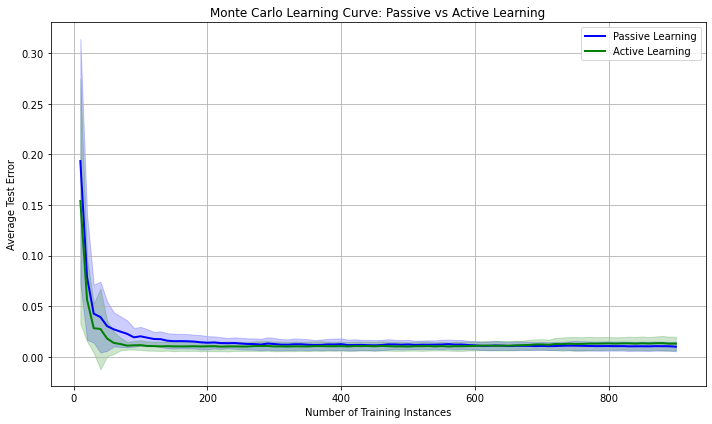

In [30]:
import matplotlib.pyplot as plt

x_vals = np.arange(10, 901, 10)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, avg_passive_errors, label='Passive Learning', color='blue', linewidth=2)
plt.fill_between(x_vals, avg_passive_errors - std_passive_errors, avg_passive_errors + std_passive_errors, color='blue', alpha=0.2)

plt.plot(x_vals, avg_active_errors, label='Active Learning', color='green', linewidth=2)
plt.fill_between(x_vals, avg_active_errors - std_active_errors, avg_active_errors + std_active_errors, color='green', alpha=0.2)

plt.xlabel("Number of Training Instances")
plt.ylabel("Average Test Error")
plt.title("Monte Carlo Learning Curve: Passive vs Active Learning")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
